<a href="https://colab.research.google.com/github/HuskyNian/HACE_project/blob/main/hace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download data directly from Roboflow

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="Ih6GcONLp9Di6dRrtIOd")
project = rf.workspace("hace").project("hace-project")
model = project.version(1).model
model

## Connecting to the google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/
!pip install ultralytics

Mounted at /content/drive
/content/drive/MyDrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.2/566.2 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 26.9 MB/s eta 0:00:00


In [56]:
# Load a model
model = YOLO("yolov8s.yaml")  # build a new model from scratch
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

# Use the model
# the data.yaml is a simple configuration file where we just need to replace the paths with the paths of our training images
# the training files and plots will be generated in the current directory, in a folder named "detect"
model.train(data="/content/drive/MyDrive/hace/data.yaml", epochs=50)  # train the model


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256

WARNING ⚠️ ConfusionMatrix plot failure: Invalid format specifier



50 epochs completed in 0.856 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.0.96 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]
                   all         54        594      0.957      0.976      0.972      0.781
Speed: 2.9ms preprocess, 4.1ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train4


WARNING ⚠️ ConfusionMatrix plot failure: Invalid format specifier


## Model evluation

In [ ]:
from ultralytics import YOLO

# Load a model

model = YOLO("yolov8s.yaml")  # build a new model from scratch
# here enter the path of the trained YOLO
model = YOLO("/content/drive/MyDrive/runs/detect/train4/weights/best.pt")  # load a pretrained model (recommended for training)

In [19]:
model.val(data='/content/drive/MyDrive/hace/data.yaml')

Ultralytics YOLOv8.0.97 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/MyDrive/hace/valid/labels.cache... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 8, len(boxes) = 594. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.69s/it]
                   all         54        594      0.957      0.976      0.971       0.78
Speed: 5.4ms preprocess, 26.9ms inference, 0.0ms loss, 8.0ms postprocess per image
Results saved to runs/detect/val0018


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7fa48254cca0>
fitness: 0.7994416583711097
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.78034])
names: {0: 'Fish-Farms'}
plot: True
results_dict: {'metrics/precision(B)': 0.9571574974490905, 'metrics/recall(B)': 0.9764309764309764, 'metrics/mAP50(B)': 0.9713831872564141, 'metrics/mAP50-95(B)': 0.7803370440505203, 'fitness': 0.7994416583711097}
save_dir: PosixPath('runs/detect/val0018')
speed: {'preprocess': 5.401584837171767, 'inference': 26.90930278212936, 'loss': 0.0012494899608470776, 'postprocess': 8.035297747011539}

In [20]:
model.val(data='/content/drive/MyDrive/hace/test.yaml')

Ultralytics YOLOv8.0.97 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/MyDrive/hace/test/labels.cache... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.41s/it]
                   all         37        404       0.95      0.939      0.946      0.737
Speed: 2.6ms preprocess, 12.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val0019


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7fa470ed7a00>
fitness: 0.7575069070012367
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.73658])
names: {0: 'Fish-Farms'}
plot: True
results_dict: {'metrics/precision(B)': 0.9499325409777158, 'metrics/recall(B)': 0.9392615767380508, 'metrics/mAP50(B)': 0.9458177216334042, 'metrics/mAP50-95(B)': 0.7365834831532181, 'fitness': 0.7575069070012367}
save_dir: PosixPath('runs/detect/val0019')
speed: {'preprocess': 2.585945902643977, 'inference': 12.431982401255015, 'loss': 0.001301636566986909, 'postprocess': 1.8047770938357792}

In [4]:
model.val(data='/content/drive/MyDrive/hace/brazil.yaml',imgsz=1280)

Ultralytics YOLOv8.0.97 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/MyDrive/hace/brazil_test/labels... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:26<00:00,  1.63s/it]
val: New cache created: /content/drive/MyDrive/hace/brazil_test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.77s/it]
                   all         16        700       0.51      0.416      0.435      0.205
Speed: 0.5ms preprocess, 23.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val0003


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7fa47c186a40>
fitness: 0.22793959692493088
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.20493])
names: {0: 'Fish-Farms'}
plot: True
results_dict: {'metrics/precision(B)': 0.5100050263768314, 'metrics/recall(B)': 0.4157142857142857, 'metrics/mAP50(B)': 0.435046406315059, 'metrics/mAP50-95(B)': 0.20492772921491662, 'fitness': 0.22793959692493088}
save_dir: PosixPath('runs/detect/val0003')
speed: {'preprocess': 0.522121787071228, 'inference': 23.10839295387268, 'loss': 0.0009387731552124023, 'postprocess': 1.0659396648406982}

In [9]:
model.val(data='/content/drive/MyDrive/hace/brazil.yaml',plots=True,imgsz=640)

Ultralytics YOLOv8.0.97 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/MyDrive/hace/brazil_test/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]
                   all         16        700      0.311      0.271      0.212     0.0746
Speed: 0.1ms preprocess, 7.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val0008


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7fa47c16bdf0>
fitness: 0.08831845268821145
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.07457])
names: {0: 'Fish-Farms'}
plot: True
results_dict: {'metrics/precision(B)': 0.31103978578118563, 'metrics/recall(B)': 0.2714285714285714, 'metrics/mAP50(B)': 0.21205635455751506, 'metrics/mAP50-95(B)': 0.0745697969249555, 'fitness': 0.08831845268821145}
save_dir: PosixPath('runs/detect/val0008')
speed: {'preprocess': 0.14388561248779297, 'inference': 7.637113332748413, 'loss': 0.0009834766387939453, 'postprocess': 2.0471960306167603}

## visualization

In [2]:
from ultralytics import YOLO

# Load a model

model = YOLO("yolov8s.yaml")  # build a new model from scratch
# here enter the path of the trained YOLO
model = YOLO("/content/drive/MyDrive/runs/detect/train4/weights/best.pt")  # load a pretrained model (recommended for training)


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256

In [3]:
import cv2
from PIL import Image
def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
  lw = max(round(sum(image.shape) / 2 * 0.003), 2)
  p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
  cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
  if label:
    tf = max(lw - 1, 1)  # font thickness
    w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
    outside = p1[1] - h >= 3
    p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
    cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
    cv2.putText(image,
                label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                0,
                lw / 3,
                txt_color,
                thickness=tf,
                lineType=cv2.LINE_AA)

def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):
  #Define COCO Labels
  if labels == []:
    labels = {0: u'__background__', 1: u'fish_cage'}
  #Define colors
  if colors == []:
    #colors = [(6, 112, 83), (253, 246, 160), (40, 132, 70), (205, 97, 162), (149, 196, 30), (106, 19, 161), (127, 175, 225), (115, 133, 176), (83, 156, 8), (182, 29, 77), (180, 11, 251), (31, 12, 123), (23, 6, 115), (167, 34, 31), (176, 216, 69), (110, 229, 222), (72, 183, 159), (90, 168, 209), (195, 4, 209), (135, 236, 21), (62, 209, 199), (87, 1, 70), (75, 40, 168), (121, 90, 126), (11, 86, 86), (40, 218, 53), (234, 76, 20), (129, 174, 192), (13, 18, 254), (45, 183, 149), (77, 234, 120), (182, 83, 207), (172, 138, 252), (201, 7, 159), (147, 240, 17), (134, 19, 233), (202, 61, 206), (177, 253, 26), (10, 139, 17), (130, 148, 106), (174, 197, 128), (106, 59, 168), (124, 180, 83), (78, 169, 4), (26, 79, 176), (185, 149, 150), (165, 253, 206), (220, 87, 0), (72, 22, 226), (64, 174, 4), (245, 131, 96), (35, 217, 142), (89, 86, 32), (80, 56, 196), (222, 136, 159), (145, 6, 219), (143, 132, 162), (175, 97, 221), (72, 3, 79), (196, 184, 237), (18, 210, 116), (8, 185, 81), (99, 181, 254), (9, 127, 123), (140, 94, 215), (39, 229, 121), (230, 51, 96), (84, 225, 33), (218, 202, 139), (129, 223, 182), (167, 46, 157), (15, 252, 5), (128, 103, 203), (197, 223, 199), (19, 238, 181), (64, 142, 167), (12, 203, 242), (69, 21, 41), (177, 184, 2), (35, 97, 56), (241, 22, 161)]
    colors = [(89, 161, 197),(67, 161, 255),(19, 222, 24),(186, 55, 2),(167, 146, 11),(190, 76, 98),(130, 172, 179),(115, 209, 128),(204, 79, 135),(136, 126, 185),(209, 213, 45),(44, 52, 10),(101, 158, 121),(179, 124, 12),(25, 33, 189),(45, 115, 11),(73, 197, 184),(62, 225, 221),(32, 46, 52),(20, 165, 16),(54, 15, 57),(12, 150, 9),(10, 46, 99),(94, 89, 46),(48, 37, 106),(42, 10, 96),(7, 164, 128),(98, 213, 120),(40, 5, 219),(54, 25, 150),(251, 74, 172),(0, 236, 196),(21, 104, 190),(226, 74, 232),(120, 67, 25),(191, 106, 197),(8, 15, 134),(21, 2, 1),(142, 63, 109),(133, 148, 146),(187, 77, 253),(155, 22, 122),(218, 130, 77),(164, 102, 79),(43, 152, 125),(185, 124, 151),(95, 159, 238),(128, 89, 85),(228, 6, 60),(6, 41, 210),(11, 1, 133),(30, 96, 58),(230, 136, 109),(126, 45, 174),(164, 63, 165),(32, 111, 29),(232, 40, 70),(55, 31, 198),(148, 211, 129),(10, 186, 211),(181, 201, 94),(55, 35, 92),(129, 140, 233),(70, 250, 116),(61, 209, 152),(216, 21, 138),(100, 0, 176),(3, 42, 70),(151, 13, 44),(216, 102, 88),(125, 216, 93),(171, 236, 47),(253, 127, 103),(205, 137, 244),(193, 137, 224),(36, 152, 214),(17, 50, 238),(154, 165, 67),(114, 129, 60),(119, 24, 48),(73, 8, 110)]
  
  #plot each boxes
  for box in boxes:
    #add score in label if score=True
    if score :
      label = labels[int(box[-1])+1] + " " + str(round(100 * float(box[-2]),1)) + "%"
    else :
      label = labels[int(box[-1])+1]
    #filter every box under conf threshold if conf threshold setted
    if conf :
      if box[-2] > conf:
        color = colors[int(box[-1])]
        box_label(image, box, label, color)
    else:
      color = colors[int(box[-1])]
      box_label(image, box, label, color)

  #show image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  pil_image = Image.fromarray(np.uint8(image))
  #cv2.imshow("image",image) #if used in Python
  return pil_image

## use a satellite image by specified longitude and latitude from google maps static API to detect the fish farms

In [4]:
import requests
from PIL import Image as PilImage
from IPython.display import Image as IPythonImage
from io import BytesIO

# set longitude and latitude
lat = -9.297778
lon = -38.241667
zoom = 17

# use Google Maps Static API to get this image
# note here you must put your own API key after "key=", or it will not work
url = f"https://maps.googleapis.com/maps/api/staticmap?center={lat},{lon}&zoom={zoom}&size=640x640&maptype=satellite&key=your_google_map_static_API_key" ### important! put your own API key after "key="

response = requests.get(url)
img = PilImage.open(BytesIO(response.content)).convert('RGB')

# show the image
display(IPythonImage(url=url))


(640, 640, 3)



0: 640x640 57 Fish-Farmss, 16.2ms
Speed: 18.3ms preprocess, 16.2ms inference, 31.3ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


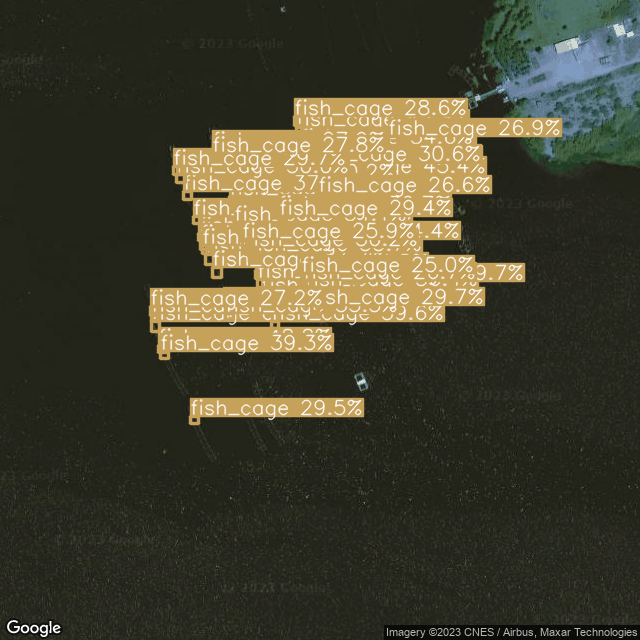

In [5]:
import numpy as np

img_array = np.array(img)
print(img_array.shape)
results = model.predict(img_array)

plot_img = plot_bboxes(img_array, results[0].boxes.boxes, conf=0.1)
plot_img

## example of using an image from your storage 

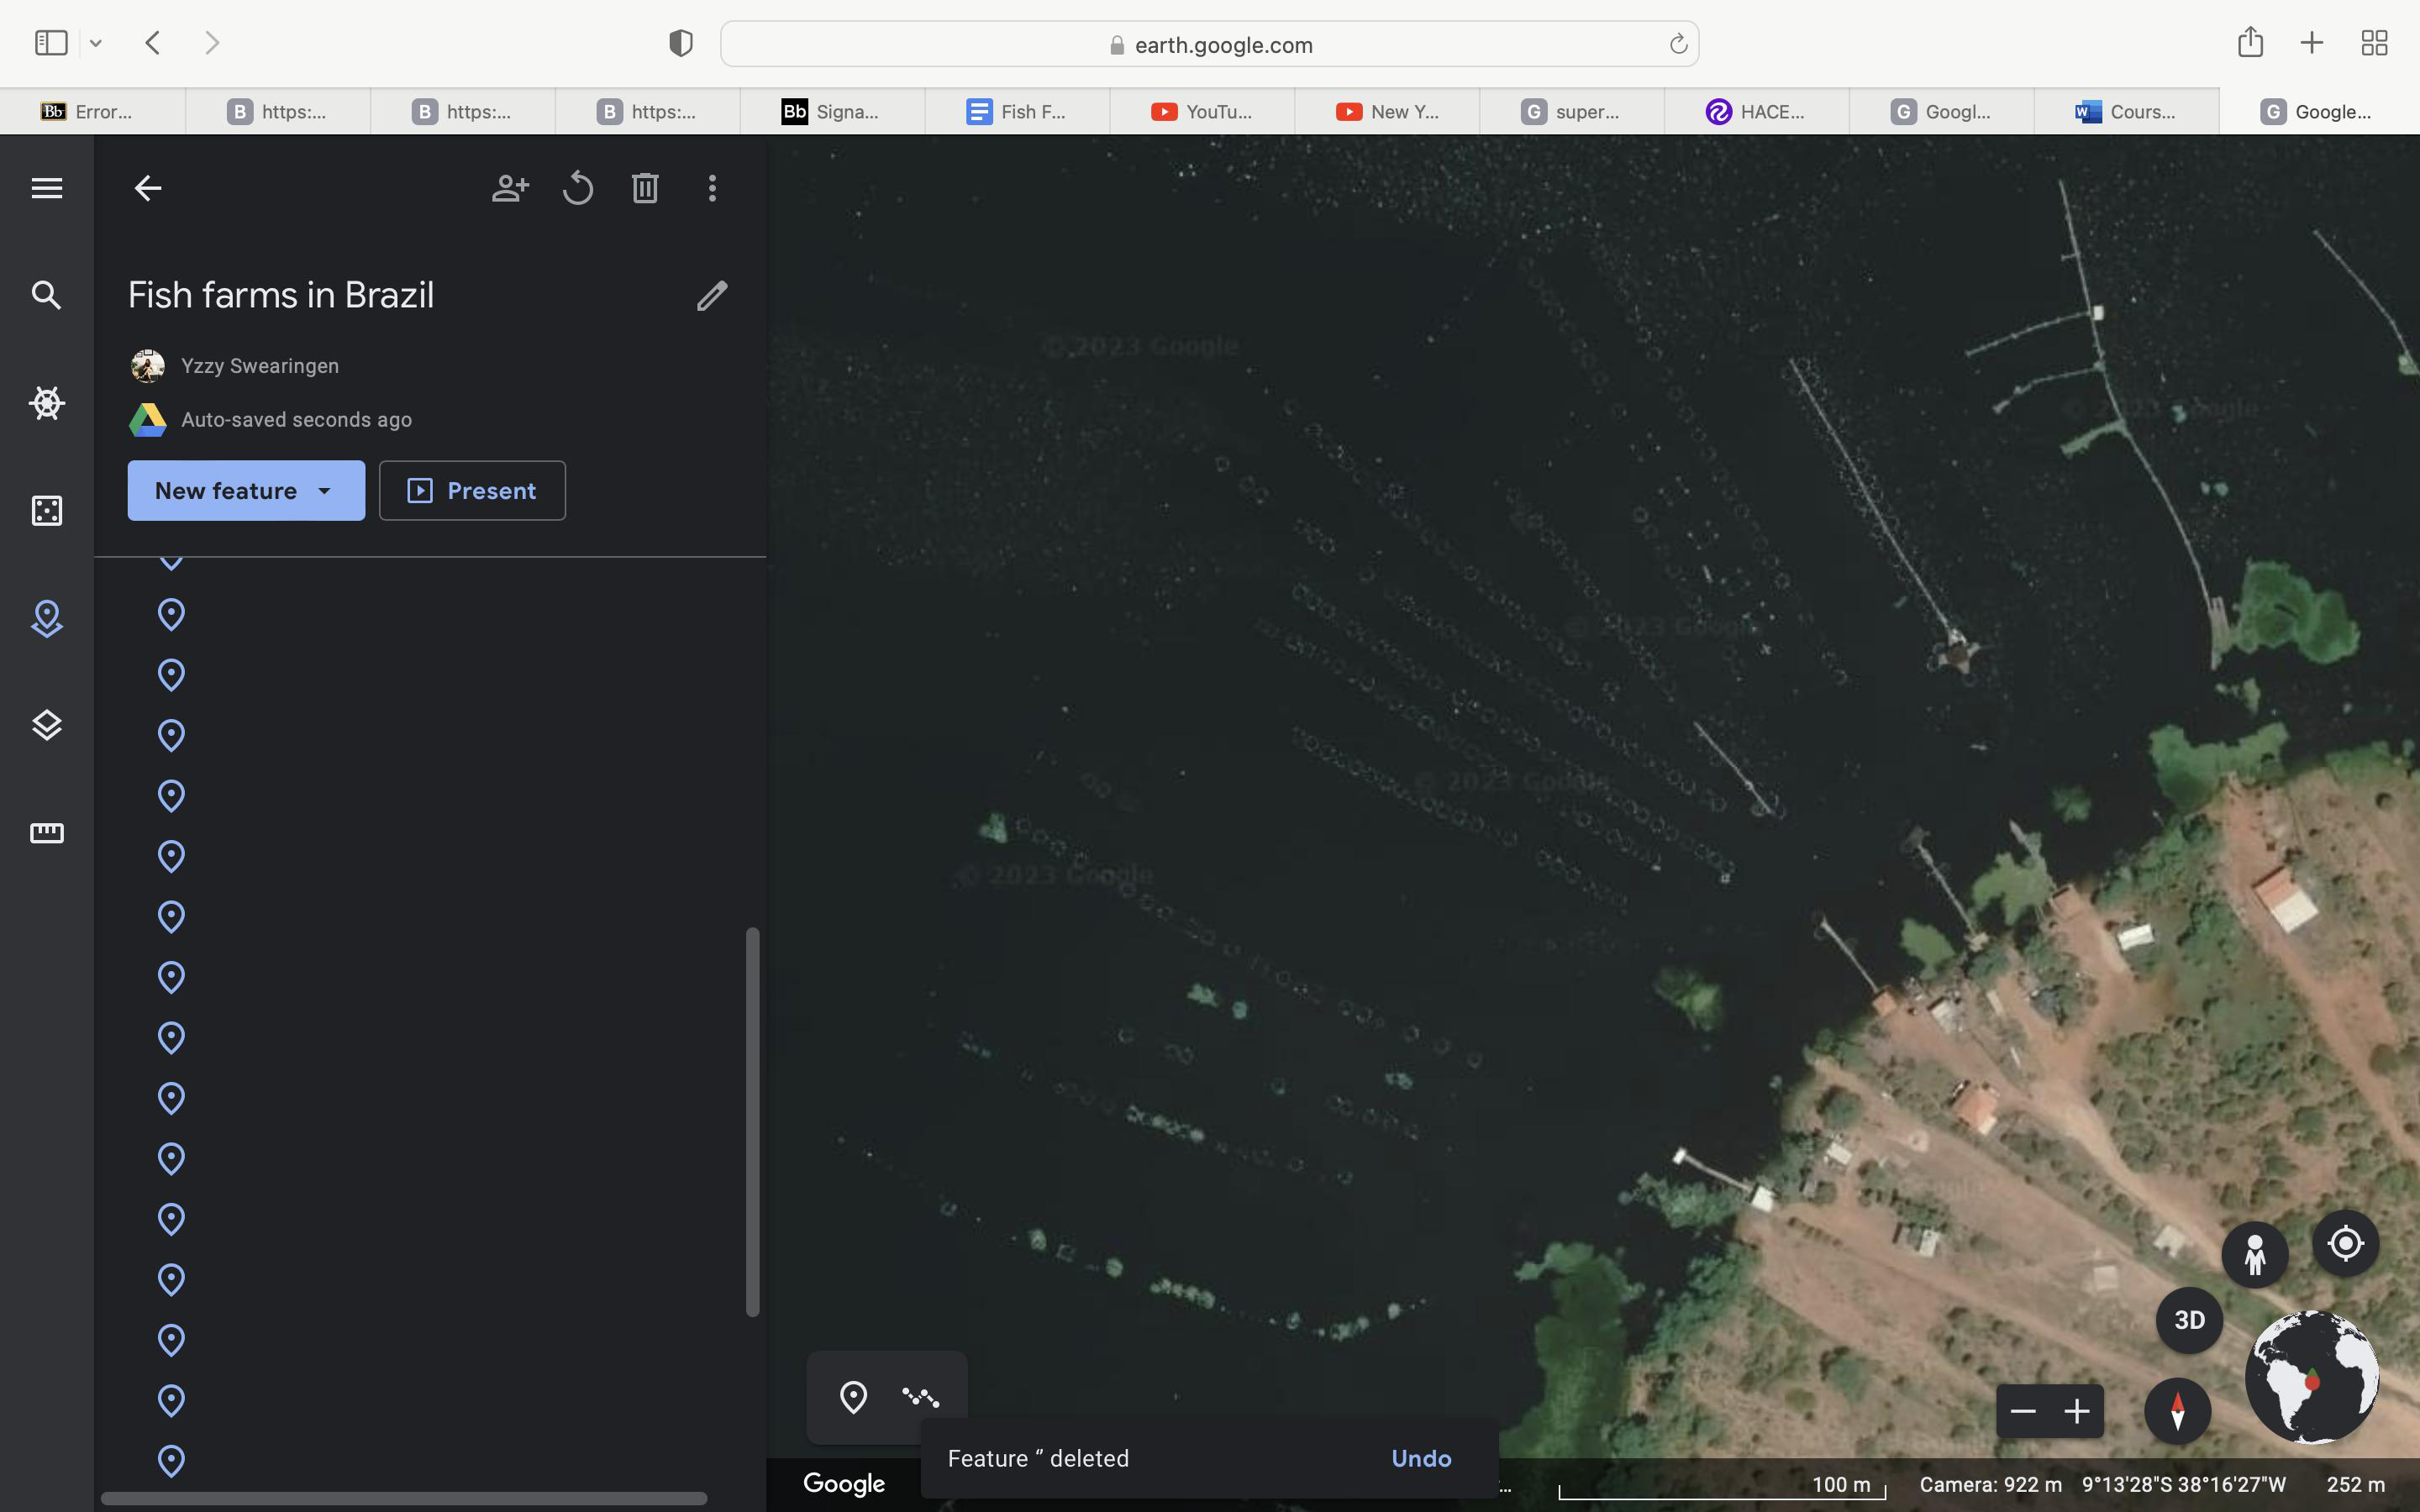

In [6]:
img = Image.open('/content/drive/MyDrive/hace/brazil_test/images/Screenshot-2023-05-06-at-15-17-34_png.rf.c75547dee437c5b8c2097e0ec18d0b10.jpg')
img


0: 800x1280 20 Fish-Farmss, 93.6ms
Speed: 21.9ms preprocess, 93.6ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


(1800, 2880, 3)


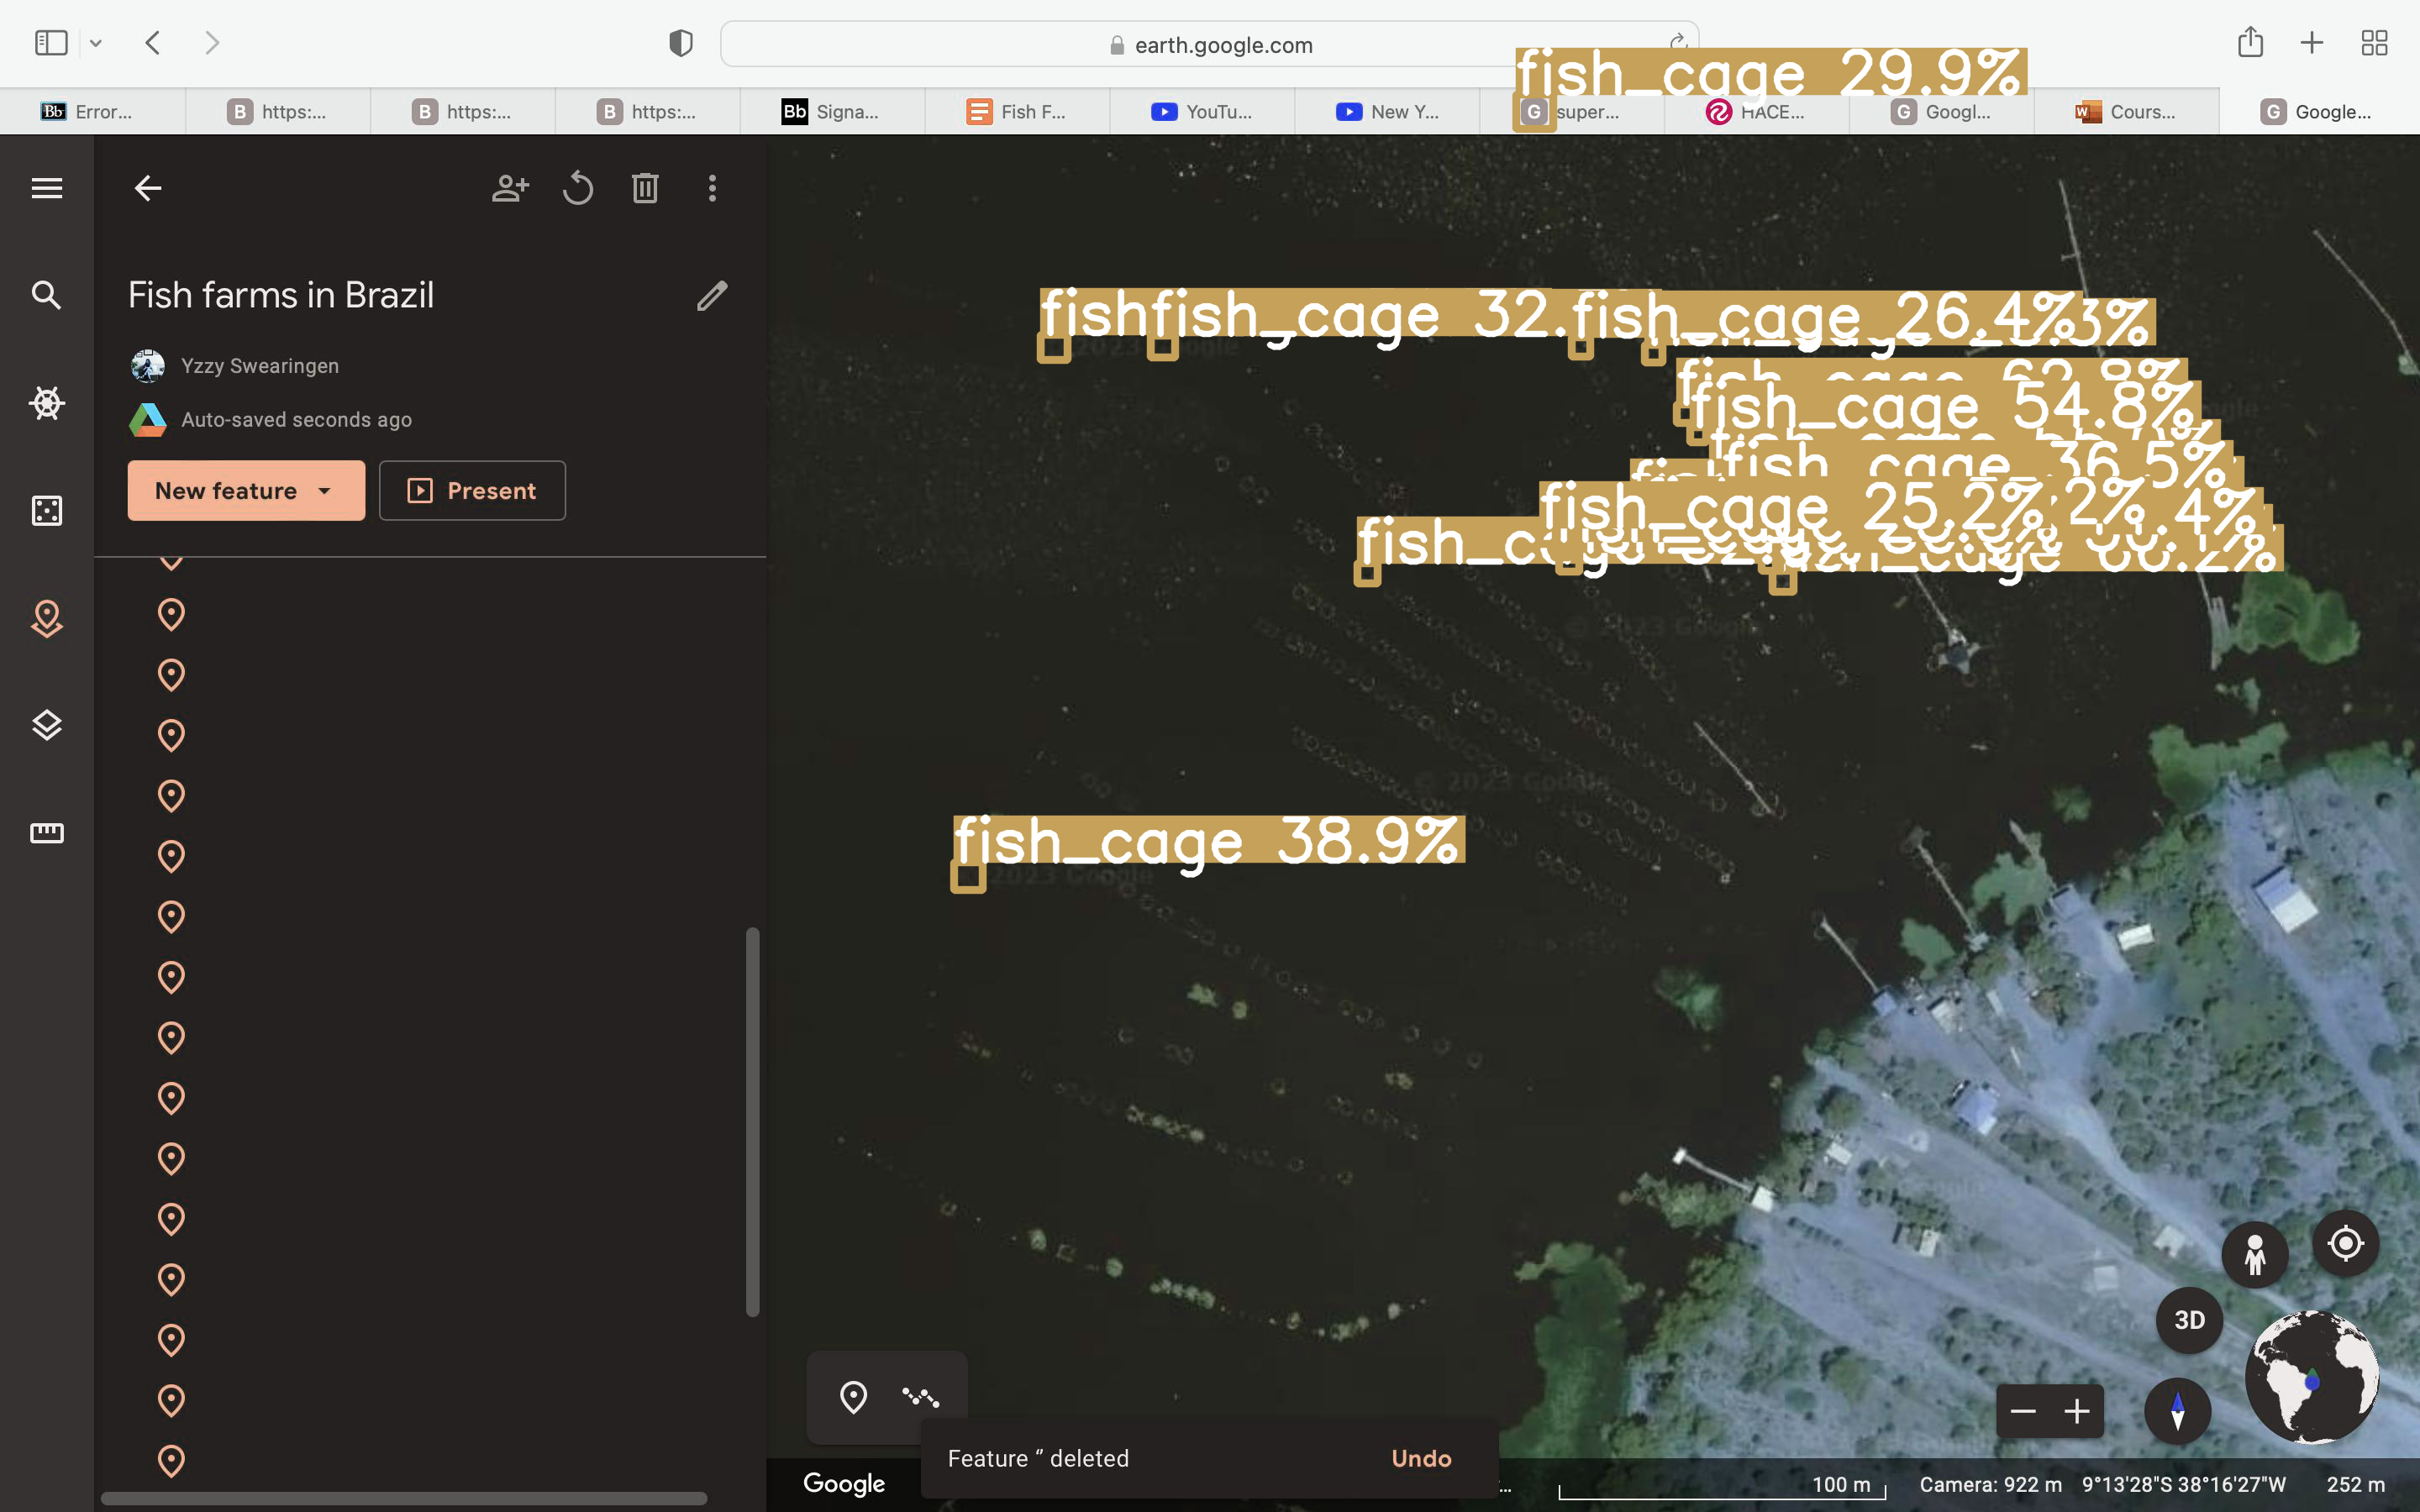

In [7]:
import numpy as np

img_array = np.array(img)
print(img_array.shape)
results = model.predict(img_array,imgsz=1280)

plot_img = plot_bboxes(img_array, results[0].boxes.boxes, conf=0.1)
plot_img

## save the image

In [ ]:
img.save("test_visual.jpg")

## google earth

<font color="red"> the codes in this part is just used for developing, including the codes of using google earth engine, but note here we used google maps static API, and these codes are just for development in the future </font>

In [ ]:
!pip install google-auth google-auth-oauthlib google-auth-httplib2 earthengine-api

In [8]:
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=vBdIh8_sLrYgn3xqpejTGWOC_odfDJGTz1Gqmpppa-k&tc=jc0tpZrsxM8q9v7ScJH2DYLBfyxVU_34HoIqUOnZgsk&cc=pr5xtOAHNS1UYGQnoMUwYFsDuB8vbUSQsDCqg6HRzGw

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VMIoPmohKOIzHezm16T8DqV43RGR7eDwDVY_dDiaxqYxWGRAi9EyA0

Successfully saved authorization token.


In [43]:
import ee
import numpy as np
from PIL import Image as PilImage
from IPython.display import Image
import requests
from io import BytesIO

# set longitude and latitude somewhere in Brazil
lat = -4.21389
lon = -40.43167
region = ee.Geometry.Rectangle([lon-0.25, lat-0.25, lon+0.25, lat+0.25])

# set the date range you want from the satellite images, one year long is better
start_date = '2021-01-01'
end_date = '2021-12-31'

# use GEE API to get images from Landsat 8 dataset
collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
                .filterDate(start_date, end_date) \
                .filterBounds(region) \
                .select(['B4', 'B3', 'B2']) \
                .map(lambda image: image.multiply(0.0001))

#check the number of images from the returned collection
count = collection.size().getInfo()
print(f'Number of images in the collection: {count}')

# if new images
if count > 0:
    #image = ee.Image(collection.sort('system:time_start', False).median())
    image=collection.median()
    url = image.getThumbUrl({
        'bands': 'B4,B3,B2',
        'min': 0,
        'max': 0.3,
        'region': region.getInfo(),
        'dimensions': '640x640',
        'format': 'png'
    })

    # download from the url and convert it into numpy array
    response = requests.get(url)
    img = PilImage.open(BytesIO(response.content))
    img_array = np.array(img)

    # show the image
    display(Image(url=url))
else:
    print('No images found in the collection.')


Number of images in the collection: 58
